# PHASE 2 PROJECT
**Presented by:** Group 4.4
***

## Dennis Mwanzia 
## Pamela Awino 
## Ian Macharia
## Samuel Igecha
## Pauline Njeri

# 1.0  Project Introduction and Overview

The aim of this project is to put into practice our newly aqcuired skills in data science to formulate and solve a real business problem. In this project, we are given a raw dataset which is the house sales prices in Northwestern County and we are supposed to formulate a real business case study and use the data to solve the business problem and provide a useful business advisory which can be used to formulate real and valuable business decisions. Unlike in phase 1, we are not given the business problem, its upon us to formulate it.

## 1.1 Data Understanding

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import statsmodels.formula.api as smf
import statsmodels.api as sm
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from my_functions import clean_data

We have been provided with King County House Sales dataset found in 'kc_house_data.csv'. There is a description of columns dataset found in the md folder 'column_names.md'. Therefore, we examine the column descriptions to understand their meaning.

In [2]:
#Unpacking the description 
with open('data/column_names.md', 'r') as f:
    md_text = f.read()

print(md_text)

# Column Names and Descriptions for King County Data Set
* `id` - Unique identifier for a house
* `date` - Date house was sold
* `price` - Sale price (prediction target)
* `bedrooms` - Number of bedrooms
* `bathrooms` - Number of bathrooms
* `sqft_living` - Square footage of living space in the home
* `sqft_lot` - Square footage of the lot
* `floors` - Number of floors (levels) in house
* `waterfront` - Whether the house is on a waterfront
  * Includes Duwamish, Elliott Bay, Puget Sound, Lake Union, Ship Canal, Lake Washington, Lake Sammamish, other lake, and river/slough waterfronts
* `view` - Quality of view from house
  * Includes views of Mt. Rainier, Olympics, Cascades, Territorial, Seattle Skyline, Puget Sound, Lake Washington, Lake Sammamish, small lake / river / creek, and other
* `condition` - How good the overall condition of the house is. Related to maintenance of house.
  * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type

In this problem, we have been given a dataset that contains the following variables;
1. id - unique identified for a house
2. dateDate - house was sold
3. pricePrice - is prediction target
4. bedroomsNumber - of Bedrooms/House
5. bathroomsNumber - of bathrooms/bedrooms
6. sqft_livingsquare - footage of the home
7. sqft_lotsquare - footage of the lot
8. floorsTotal - floors (levels) in house
9. waterfront - House which has a view to a waterfront
10. view - Has been viewed
11. condition - How good the condition is ( Overall )
12. grade - overall grade given to the housing unit, based on King County grading system
13. sqft_above - square footage of house apart from basement
14. sqft_basement - square footage of the basement
15. yr_built - Built Year
16. yr_renovated - Year when house was renovated
17. zipcode - zip
18. lat - Latitude coordinate
19. long - Longitude coordinate
20. sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
21. sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

## Business Understanding

## Business Problem

The business problem is to provide guidance to Kings Wajenzi Developers, a prospective real estate developer in King County, on the most profitable types of properties to target in the current market. The guidance will include recommendations on optimal locations, features, and time of year when homeowners are most likely to purchase properties. Our objective as junior data analysts at a Real Estate Agency is to analyze house sales data in King County and leverage the insights generated to guide the developer in selecting the most profitable properties to develop and maximize their profits. With King County's population on the rise and income stabilizing after the COVID-19 pandemic, demand for new homes in the area is at an all-time high.

## 1.2 Objectives

1. Does the time of the year affect the price of an house? If yes, which seasons/Months are most profitable?
2. Does Location affect prices? If yes, which locations within King county attract highest price of houses?
3. Which features/Attributes have the highest impact on sales price of houses/properties? Which features should the developer focus on when developing their upcoming projects in King County?


# 2.0 Data Exploration

In [3]:
df = pd.read_csv('data/kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [4]:
df.shape

(21597, 21)

The dataset has 21597 rows and 21 columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

The whole dataset is stored as pandas dataframe. We have three types of datatypes for columns which are integers, floats and objects. Since we are interested in running a linear regression model, we would like all the columns, to be numeric datatypes. However, some columns like date, waterfront, view, condition, grade, sqft_basement are objects and most likely categorical variables and will need to be transformed to dummy variables using one-hote encoding function of python. Intergers will also need to be examined to determine if they are binary variables or numeric data types. 

## 3.0 Data Cleaning

In [6]:
#Checking for how many missing values
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [7]:
df.duplicated().sum()

0

Waterfront, view and year renovated have missing values. Lets check the percentage of missing values in the dataset.b

In [8]:
# Get percentage of missing values
for col in ['waterfront', 'view', 'yr_renovated']:
    percent_missing = df[col].isnull().sum() * 100 / len(df)
    print(f"{col}:{round(percent_missing,2)}")

waterfront:11.0
view:0.29
yr_renovated:17.79


Waterfront, view and year renovated have 11.0%, 0.29%, and 17.79% respectively of missing data. Waterfront, and view are objects and therefore, we can replace the missing values with the mode while yr_renovated is a integer and hence we will replace the missing values with zeros. This is because we assumed that for any missing values, there was no renovation that was undertaken for that specific unit. 

In [9]:
print (df['waterfront'].mode())
print (df['view'].mode())

0    NO
Name: waterfront, dtype: object
0    NONE
Name: view, dtype: object


In [10]:
df1 = clean_data(df)
df1

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,zipcode,lat,long,month_sold,year_sold,age,renovated
0,221900.0,3,1.00,1180,5650,1.0,0,0,0,0,1180,0.0,0.0,98178,47.5112,-122.257,10,2014,60,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,0,0,2170,400.0,1991.0,98125,47.7210,-122.319,12,2014,64,0
2,180000.0,2,1.00,770,10000,1.0,0,0,0,0,770,0.0,0.0,98028,47.7379,-122.233,2,2015,82,0
3,604000.0,4,3.00,1960,5000,1.0,0,0,0,0,1050,910.0,0.0,98136,47.5208,-122.393,12,2014,50,0
4,510000.0,3,2.00,1680,8080,1.0,0,0,0,0,1680,0.0,0.0,98074,47.6168,-122.045,2,2015,28,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,0,0,0,0,1530,0.0,0.0,98103,47.6993,-122.346,5,2014,6,0
21593,400000.0,4,2.50,2310,5813,2.0,0,0,0,0,2310,0.0,0.0,98146,47.5107,-122.362,2,2015,1,1
21594,402101.0,2,0.75,1020,1350,2.0,0,0,0,0,1020,0.0,0.0,98144,47.5944,-122.299,6,2014,6,0
21595,400000.0,3,2.50,1600,2388,2.0,0,0,0,0,1600,0.0,0.0,98027,47.5345,-122.069,1,2015,11,0


In [11]:
# check if all missing values have been resolved
df.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
month_sold       0
year_sold        0
age              0
dtype: int64

We no longer have any missing values, therefore we proceed to check for duplicates.

In [12]:
#checking for duplicates
df.duplicated().sum()


2

In [13]:
duplicates = df[df.duplicated()]

duplicates

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,month_sold,year_sold,age
4348,259950.0,2,2.00,1070,649,2.0,0,0,0,0,720,350.0,2008,0.0,98106,47.5213,-122.357,3,2015,7
20508,529500.0,3,2.25,1410,905,3.0,0,0,0,0,1410,0.0,2014,0.0,98116,47.5818,-122.402,3,2015,1


We dont have any duplicates and therefore we can proceed to investigate the integer and object data types and perform the necessary transformations for our multiple regression model.

In [14]:
df.info()
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   waterfront     21597 non-null  int64  
 7   view           21597 non-null  int64  
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21597 non-null  float64
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   21597 non-null  float64
 14  zipcode        21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  month_sold     21597 non-null  int64  
 18  year_s

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,month_sold,year_sold,age
0,221900.0,3,1.00,1180,5650,1.0,0,0,0,0,1180,0.0,1955,0.0,98178,47.5112,-122.257,10,2014,60
1,538000.0,3,2.25,2570,7242,2.0,0,0,0,0,2170,400.0,1951,1991.0,98125,47.7210,-122.319,12,2014,64
2,180000.0,2,1.00,770,10000,1.0,0,0,0,0,770,0.0,1933,0.0,98028,47.7379,-122.233,2,2015,82
3,604000.0,4,3.00,1960,5000,1.0,0,0,0,0,1050,910.0,1965,0.0,98136,47.5208,-122.393,12,2014,50
4,510000.0,3,2.00,1680,8080,1.0,0,0,0,0,1680,0.0,1987,0.0,98074,47.6168,-122.045,2,2015,28


### Checking for Outliers

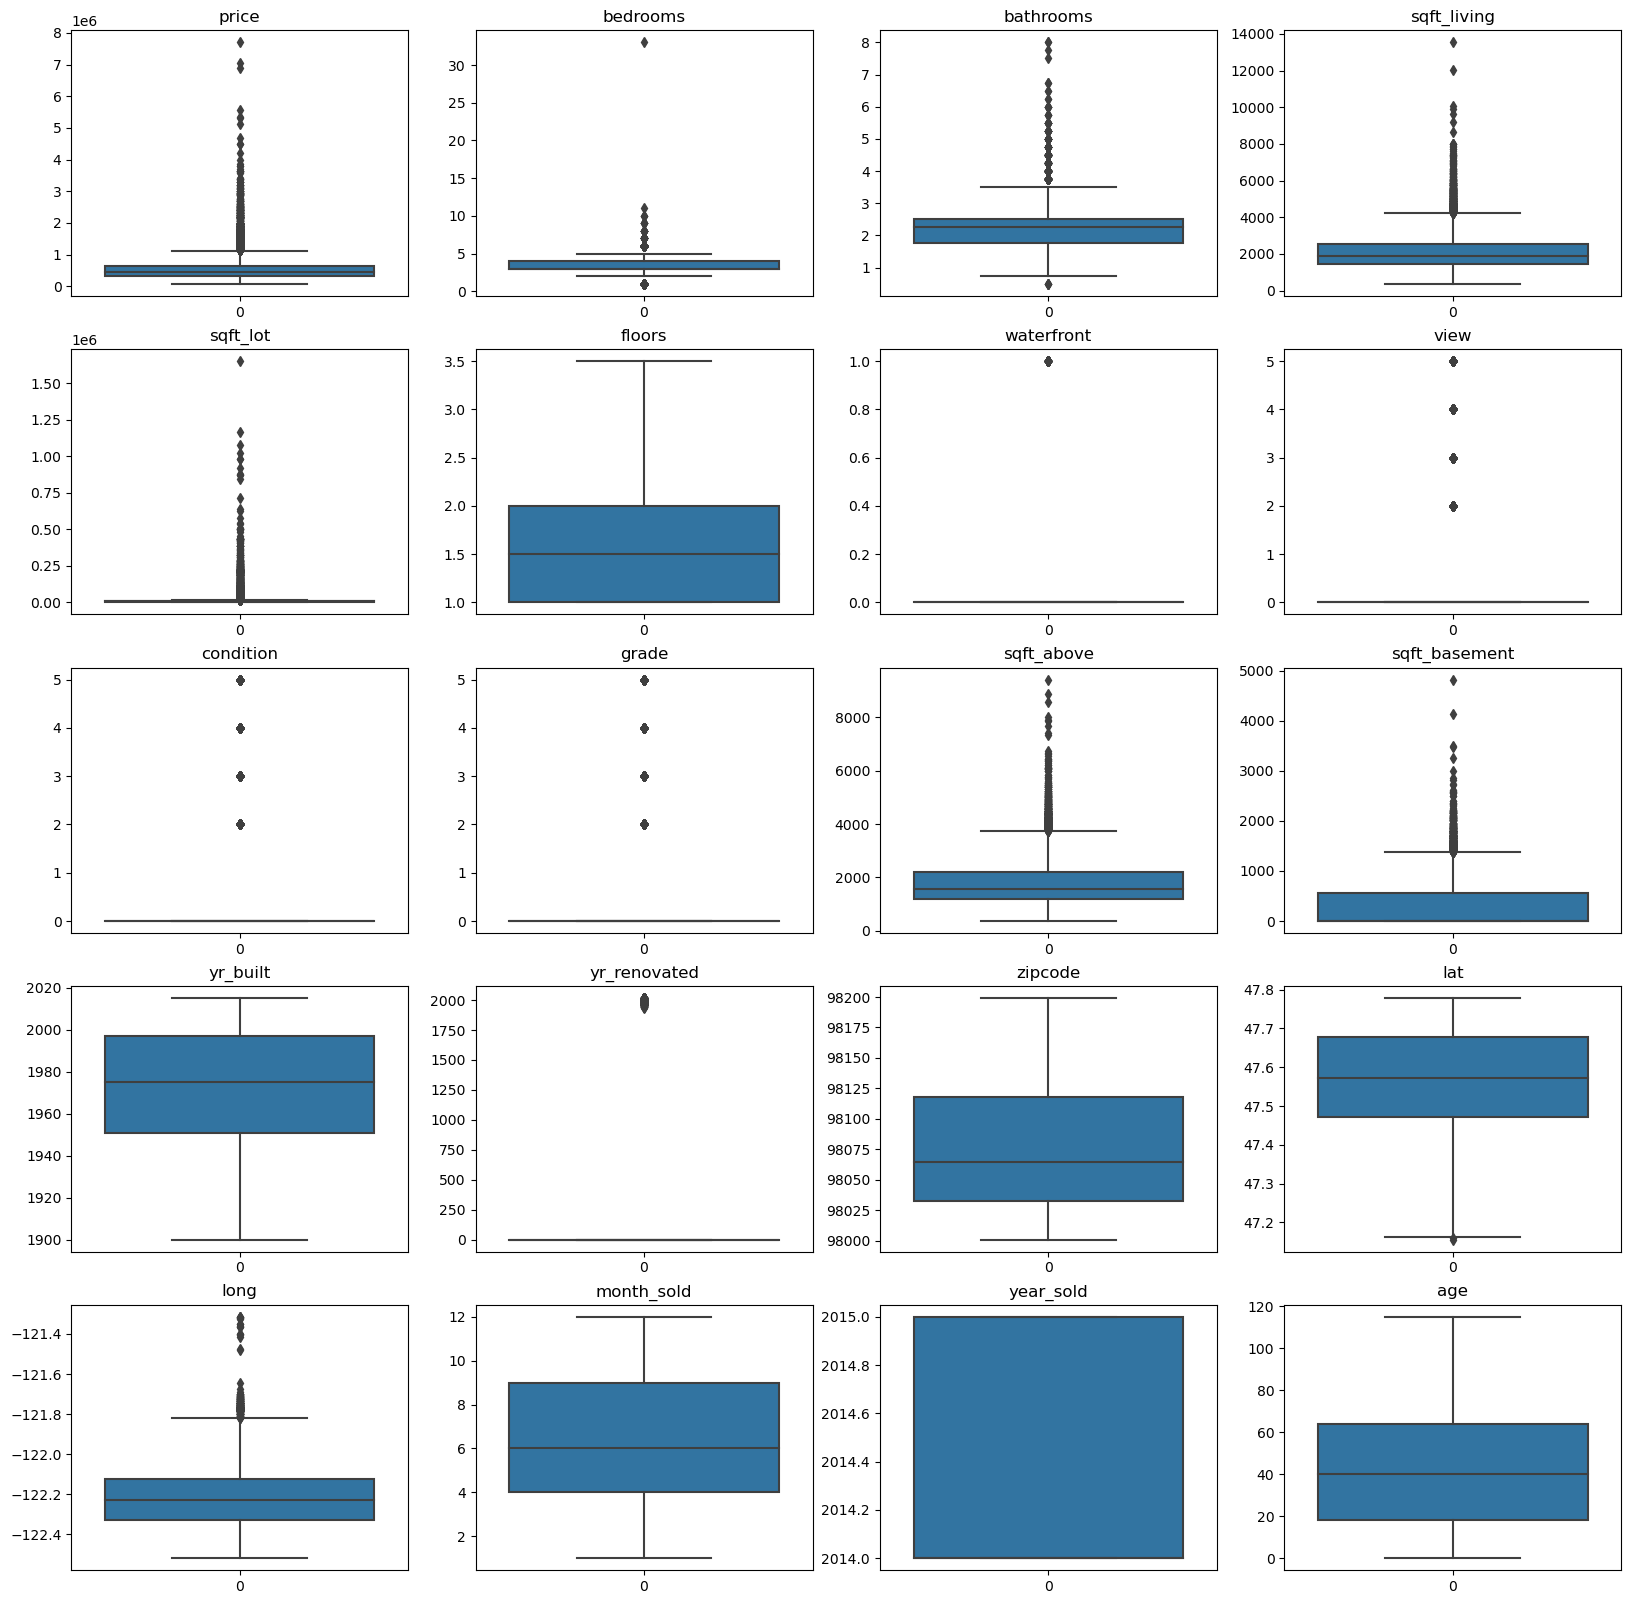

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the variables you want to plot
cols_to_plot = df.select_dtypes(include=['int64', 'float64']).columns

# Calculate the number of rows and columns needed for the plot
nrows = int(len(cols_to_plot) / 4) 
ncols = 4

# Create a grid of boxplots, arranged in a nrows x ncols layout
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 20))

# Loop over the selected variables and plot each one in a separate subplot
for i, col in enumerate(cols_to_plot):
    row_idx = i // ncols
    col_idx = i % ncols
    sns.boxplot(data=df[col], ax=axs[row_idx, col_idx])
    axs[row_idx, col_idx].set_title(col)

# Show the plot
plt.show()


 Lets describe and remove the outliers 

In [16]:
#Ian & Pamela Work on Divide price into high , medium, low 
# Visualize for us prices vs features 
# Pauline Work on the code to ensure its running for all of us
# Pamela 

## 4.0 Data Analysis

## 4.1 Seasons

In [17]:
# create a dictionary mapping month numbers to month names
month_dict = dict(enumerate(calendar.month_name))

# apply the dictionary to the month_sold column to get month names
df['month_name'] = df['month_sold'].apply(lambda x: month_dict[x])

# define seasons based on months
seasons = {'Winter': ['December', 'January', 'February'],
           'Spring': ['March', 'April', 'May'],
           'Summer': ['June', 'July', 'August'],
           'Fall': ['September', 'October', 'November']}

# create a new 'season' column based on the 'month_sold' column
df['season'] = df['month_name'].apply(lambda x: next((season for season, months in seasons.items() if x in months), None))
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,month_sold,year_sold,age,month_name,season
0,221900.0,3,1.00,1180,5650,1.0,0,0,0,0,...,1955,0.0,98178,47.5112,-122.257,10,2014,60,October,Fall
1,538000.0,3,2.25,2570,7242,2.0,0,0,0,0,...,1951,1991.0,98125,47.7210,-122.319,12,2014,64,December,Winter
2,180000.0,2,1.00,770,10000,1.0,0,0,0,0,...,1933,0.0,98028,47.7379,-122.233,2,2015,82,February,Winter
3,604000.0,4,3.00,1960,5000,1.0,0,0,0,0,...,1965,0.0,98136,47.5208,-122.393,12,2014,50,December,Winter
4,510000.0,3,2.00,1680,8080,1.0,0,0,0,0,...,1987,0.0,98074,47.6168,-122.045,2,2015,28,February,Winter


In [18]:
# Group by season and month_sold, and count the number of sales for each group
season_sales = df.groupby(['season', 'month_sold'])['price'].count()
# Find the season with the most sales

best_season = season_sales.groupby('season').max()

# Sort the seasons by total sales in descending order
best_season = best_season.sort_values(ascending=False)

# Print the season and corresponding months with the amount sold in each season
for season in best_season.index:
    months = ', '.join(seasons[season])
    sales = season_sales.loc[season]
    print(f"{season} ({months}): {sales.sum()} sales")
    print(sales)

Spring (March, April, May): 6518 sales
month_sold
3    1875
4    2229
5    2414
Name: price, dtype: int64
Summer (June, July, August): 6328 sales
month_sold
6    2178
7    2211
8    1939
Name: price, dtype: int64
Fall (September, October, November): 5056 sales
month_sold
9     1771
10    1876
11    1409
Name: price, dtype: int64
Winter (December, January, February): 3695 sales
month_sold
1      978
2     1247
12    1470
Name: price, dtype: int64


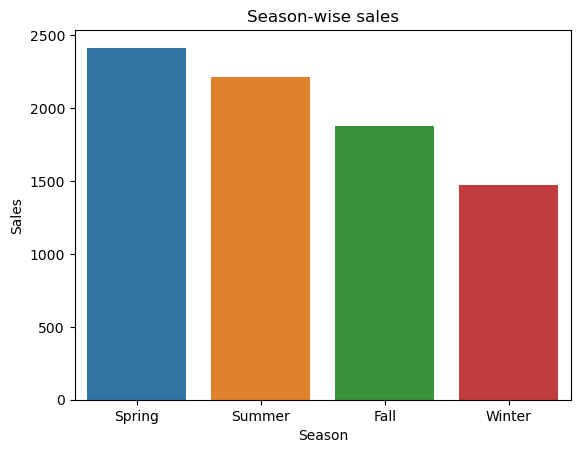

In [19]:
# Create a bar chart to show the sales for each season
sns.barplot(x=best_season.index, y=best_season.values)
plt.title('Season-wise sales')
plt.xlabel('Season')
plt.ylabel('Sales')
plt.show()

Looking at the sales data, we can see that the spring months of March, April, and May are the best for selling houses with a total of 6518 sales. This is likely due to the fact that Spring is a time of renewal and growth, and people may be more willing to make big changes such as buying a new home during this time. May is the most popular month for selling homes within Spring, with 2414 sales.

Summer, which comprises the months of June, July, and August, had a slightly lower total sales of 6328 compared to spring. July had the highest sales with 2211 followed by June with 2178 and 
August with 1939.

The fall season of September, October, and November had a total of 5056 sales, with October having the highest sales of 1876 followed by September with 1771 and November with 1409.

Lastly, the winter season of December, January, and February had the lowest total sales of 3695. December had the highest sales with 1470 followed by February with 1247 and January with 978. This may be due to the fact that Winter is a time when people tend to stay indoors and may be less inclined to go through the hassle of buying or selling a home.

Overall, it is important to note that this conclusion is based solely on the provided data and may not be reflective of larger trends in the housing market. Additionally, there may be some inaccuracies in the data such as missing or incomplete records, which could affect the accuracy of these findings.


## 4.2 Location

Location is key when it comes to real estate. Our second objective seeks to understand the geographical distribution of the homes in our dataset and determine where the highest house sales were recorded.

In [20]:
import plotly.graph_objs as go

# Define the map layout
layout = go.Layout(
    title='Housing Sales by Location',
    autosize=True,
    hovermode='closest',
    mapbox=dict(
        style='stamen-terrain',
        bearing=0,
        center=dict(
            lat=df['lat'].median(),
            lon=df['long'].median()
        ),
        pitch=0,
        zoom=10
    ),
)

# Define the map data as a scatter plot of the coordinates
data = go.Scattermapbox(
    lat=df['lat'],
    lon=df['long'],
    mode='markers',
    marker=dict(
        size=5,
        color=df['price'],
        
        opacity=0.8
    ),
    text=['Price: ${}'.format(i) for i in df['price']],
    hovertext = df.apply(lambda x: f"Price: ${x['price']}, Waterfront: {x['waterfront']}", axis=1),
)

# Create the map figure and show it
fig = go.Figure(data=[data], layout=layout)
fig.show()

Based on the plotted graph, it is evident that a significant number of high-end residences are situated in the Bellevue area. The region comprises of a considerable size of uninhabitable mountainous terrain, which concentrates most of the housing in the towns. As a result, these towns appear to have a higher density of housing compared to the surrounding areas. 
Additionally, it is important to note that the plot may not be entirely accurate and there may be some data points that are not representative of the actual situation. For example, some properties may be incorrectly labeled as having waterfront access when they do not, which could affect their price and skew the distribution shown in the plot.
However, it is important to note that this statement is limited to the data presented in the plot and may not necessarily represent the overall distribution residences in the area. Further analysis and data may be required to make more conclusive observations.

## 4.3 Zip code

In [21]:
# Explore zipcode
df['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

There are 70 unique zipcodes represented in our dataset.

Let us create a heatmap to explore the median house price per zipcode and see if we can establish zipcode 'tiers'. We will make use of a geojson file showing the zip code boundaries and extract price and zipcode data from our dataset.

In [22]:
# Extract price and zipcode from our dataset
dfrel = df[['zipcode', 'price']]

# Groupby zipcode and take median price
dfrel = dfrel.groupby(dfrel['zipcode']).median()

# Reset index after groupy
dfrel = dfrel.reset_index()

# Change type to str
dfrel['zipcode'] = dfrel['zipcode'].astype(str)

# Rename column to match type
dfrel = dfrel.rename(columns = {'zipcode' : 'ZIPCODE'})

# Check
dfrel

,ZIPCODE,price
0,98001,260000.0
1,98002,235000.0
2,98003,267475.0
3,98004,1150000.0
4,98005,765475.0
...,...,...
65,98177,554000.0
66,98178,278277.0
67,98188,264000.0
68,98198,265000.0


From the above results, we can conclude that zip code do not directly affect house price since they vary with no uniformity.

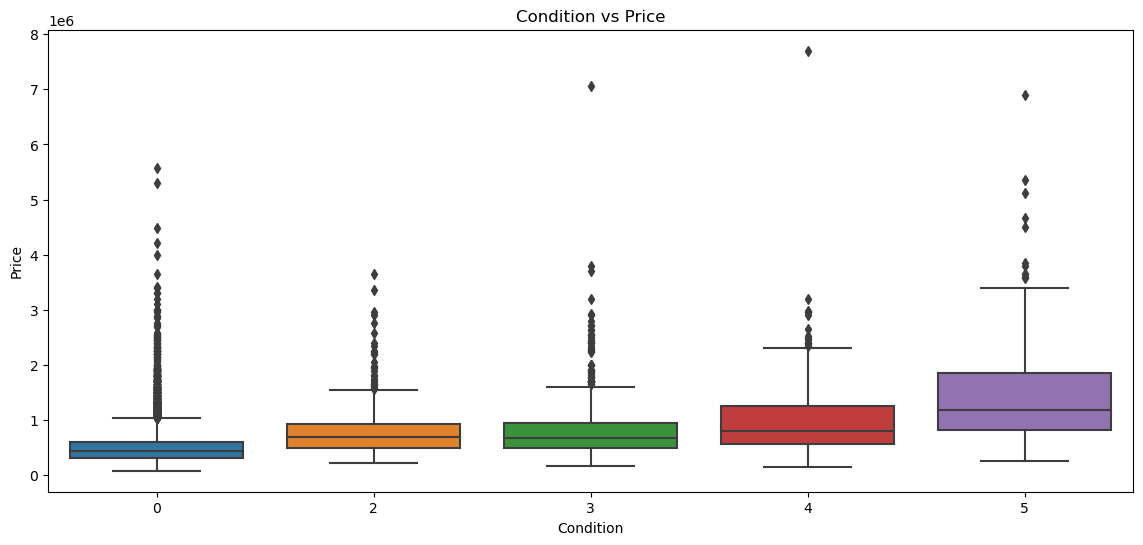

In [30]:
# Create a new DataFrame with only the necessary columns
subset = df[['price', 'condition']]

# Set the figure size
plt.figure(figsize=(14, 6))

# Create a boxplot using seaborn
sns.boxplot(x='condition', y='price', data=subset)

# Add a title and axis labels
plt.title('Condition vs Price')
plt.ylabel('Price')
plt.xlabel('Condition')

# Show the plot
plt.show()

In [31]:
# Group the data by condition and calculate summary statistics on price
summary_stats = df.groupby('condition')['price'].agg(['mean', 'median', 'std'])

# Print the summary statistics
print(summary_stats)


                   mean     median            std
condition                                        
0          4.972107e+05   433000.0  289601.481211
2          8.133733e+05   691944.0  512776.626107
3          7.913904e+05   675000.0  510385.693444
4          9.732852e+05   802500.0  613898.399842
5          1.452466e+06  1180000.0  930747.701932


Houses with a condition of 4 or 5 generally have higher sales prices than houses with a condition of 0 or 2, which may indicate that renovating houses in these conditions may yield higher returns.

Houses with a higher standard deviation in sales prices may indicate that renovating houses in that condition may be riskier, as there may be greater variability in the potential return on investment.

In [28]:
df1.condition.value_counts()

0    19485
3      957
4      508
2      330
5      317
Name: condition, dtype: int64

## 5.1 Modeling

In [ ]:
# Looking at correlations between other variables and price
df.corr()["price"]

In [ ]:
# Since Sqft_living is the feature with the strongest correlation in our dataset let's build our baseline model with that
df.plot.scatter(x="sqft_living", y="price");

There appears to be a fairly clear linear relationship between the Square footage of living space feature and price of a home in King County. We can use this to make a baseline model.

In [ ]:
y = df["price"]
X_baseline = df[["sqft_living"]]

In [ ]:
baseline_model = sm.OLS(y, sm.add_constant(X_baseline))
baseline_results = baseline_model.fit()

print(baseline_results.summary())

In [ ]:
# display model coefficients
baseline_results.params

### Baseline Model results

Looking at our summary above, our regression line is
$$ Price = 280 * sqft\_living - $43,988 $$

* The model is statistically significant as we can see, the p-value is below 0.05
* The model explains about 49%  of the variance in price looking at the R-Squared value which is 0.493
* The model coefficients (const and sqft_living) are both statistically significant, with t-statistic p-values well below 0.05
* If a house had a living space of 850 square feet , we would expect price to be about $194,000
* Generally speaking, as the living space of the house increases, so does the price of the house




### 5.2 Baseline Model visualization

In [ ]:
fig, ax = plt.subplots()
df.plot.scatter(x="sqft_living", y="price", label="Data points", ax=ax)
sm.graphics.abline_plot(model_results=baseline_results, label="Regression line", ax=ax, color="black")
ax.legend();

Actions Points # check data types, separate date and month, then create a new column for date, month, and maybe season, autum, spring, winter, fall. 
Round off bathrooms to whole numbers since we cant have bathrooms as decimals
One-hot encode waterfront, view , grade, condition. 

## Limitations of the dataset
* Lack of data on how much renovations typically cost so as to better provide recommendations on whether renovating a house is a good profitable agenda that a property developer should be pursuing

* Lack of current data to 
